In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [39]:
# Load the files
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [40]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
# Get number of observations for test and train
print([len(x) for x in [train_df, test_df]])

[891, 418]


In [43]:
# Combine it into one large file for data exploration and cleaning
combined_df = pd.concat([train_df, test_df])

# EDA

In [44]:
combined_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [45]:
combined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

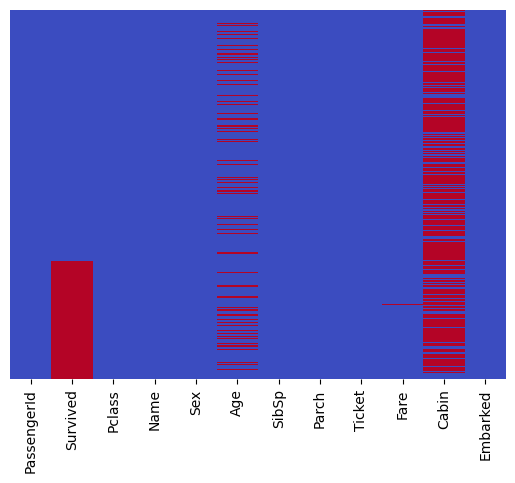

In [46]:
sns.heatmap(combined_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [47]:
# new feature
combined_df['Died'] = 1 - combined_df['Survived']

<Axes: xlabel='Sex'>

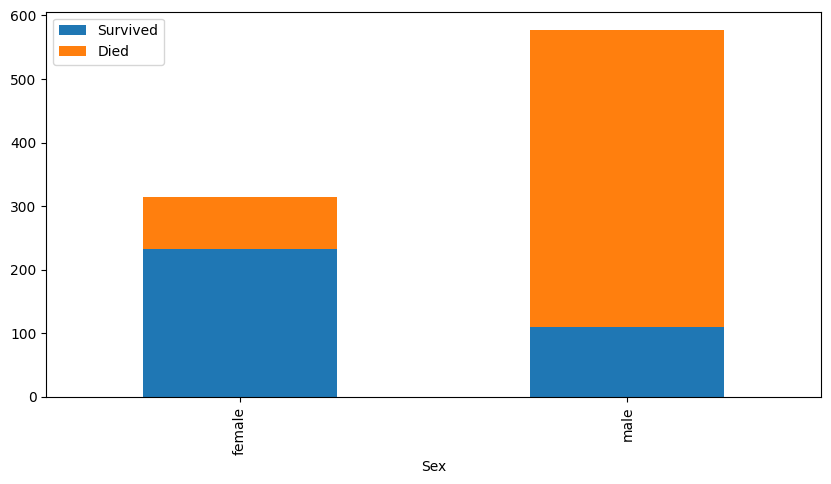

In [48]:
# Does age determine survivor? female has a higher probability of survival

combined_df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5), stacked=True)

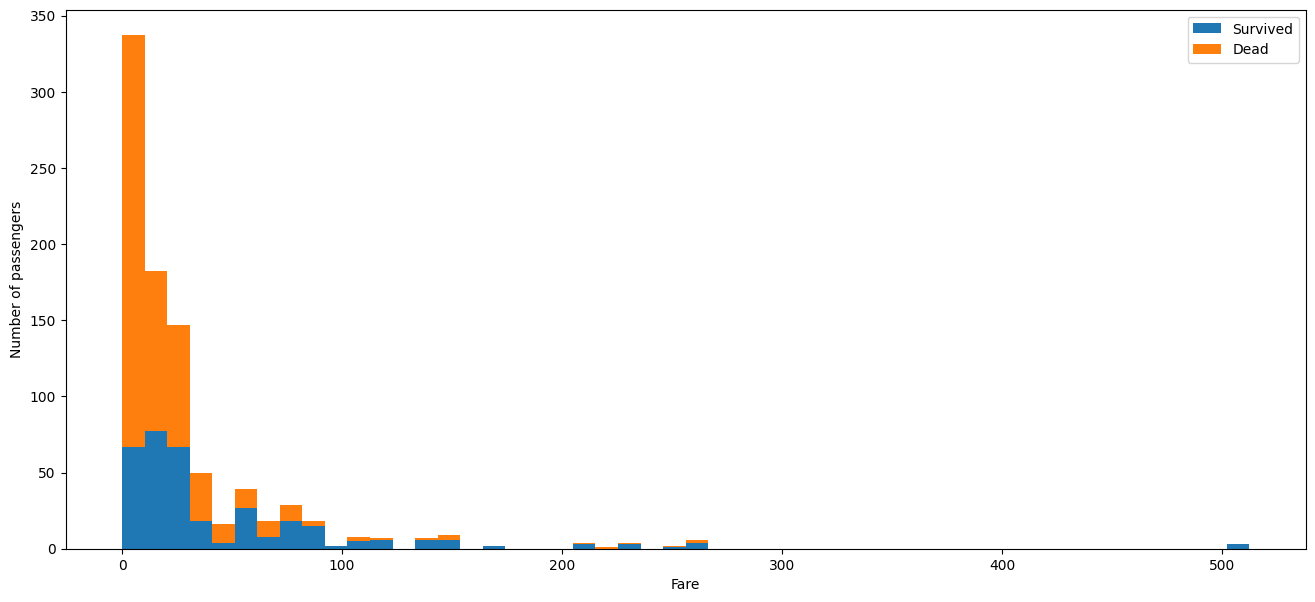

In [49]:
# Does fare determine survivor? >$50 have a higher probability of survival

figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['Fare'], combined_df[combined_df['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

<Axes: xlabel='Pclass'>

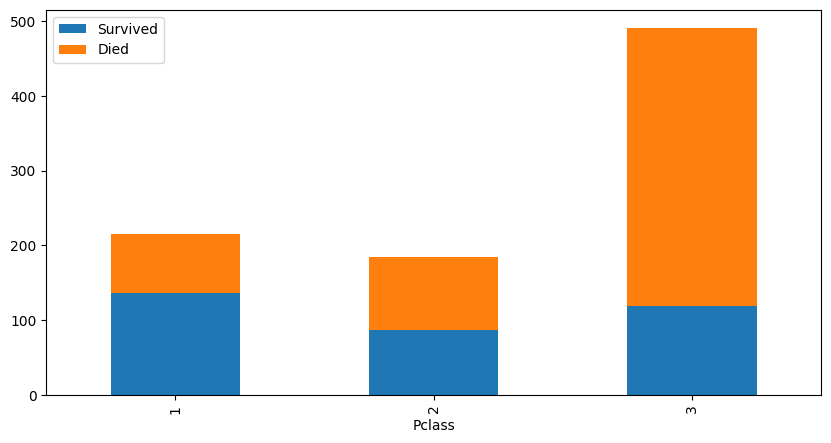

In [50]:
# Does class determine survivor? Class 3 more likely to die

combined_df.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5), stacked=True)

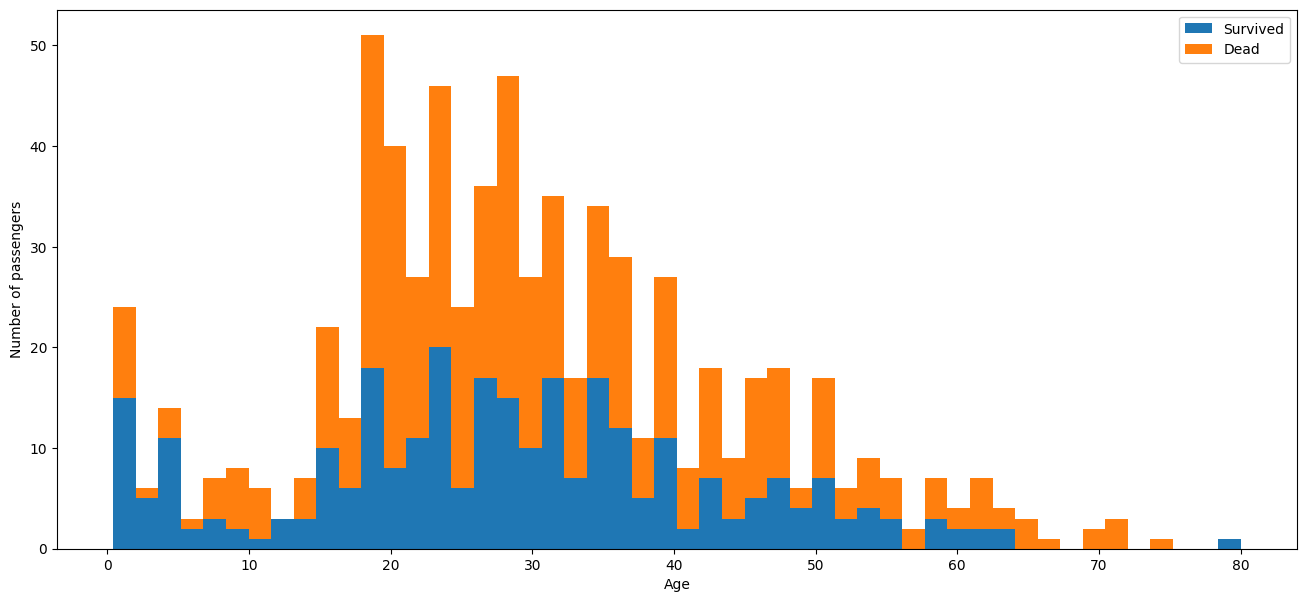

In [51]:
# Does age determine survivor? Younger kids has high chance of survivor

figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['Age'], combined_df[combined_df['Survived'] == 0]['Age']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

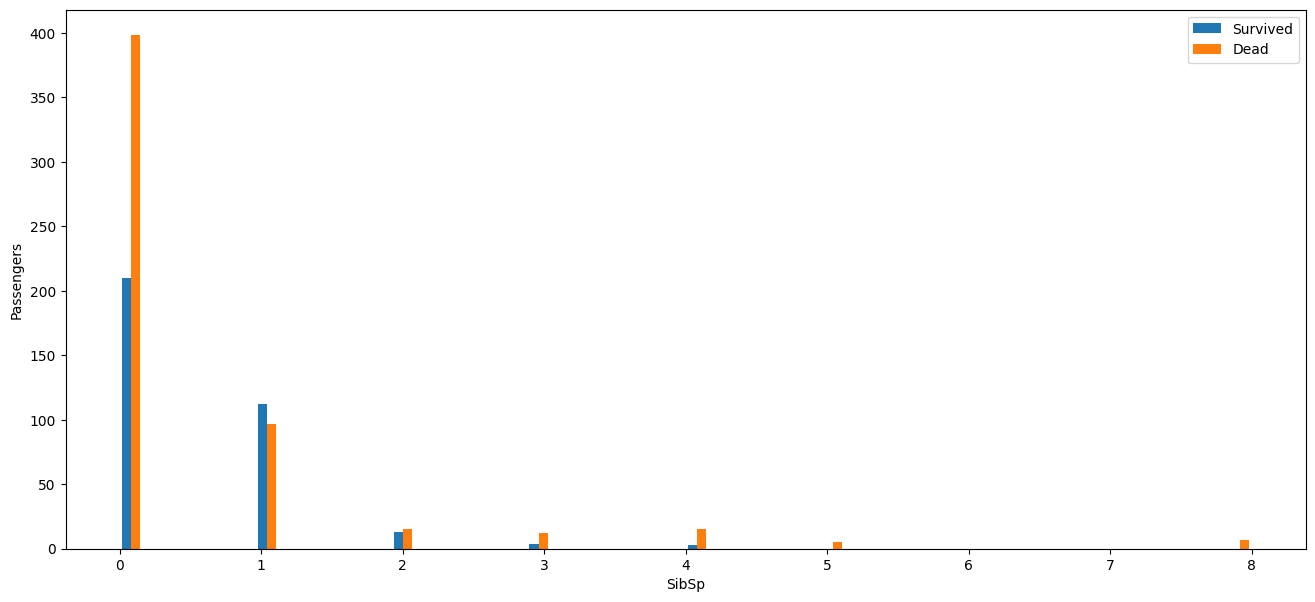

In [52]:
# Does having siblings determine survivor? Families seems to have a bigger chance to survive

figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['SibSp'], combined_df[combined_df['Survived'] == 0]['SibSp']], 
         stacked=False, bins = 50, label = ['Survived','Dead'])
plt.xlabel('SibSp')
plt.ylabel('Passengers')
plt.legend()

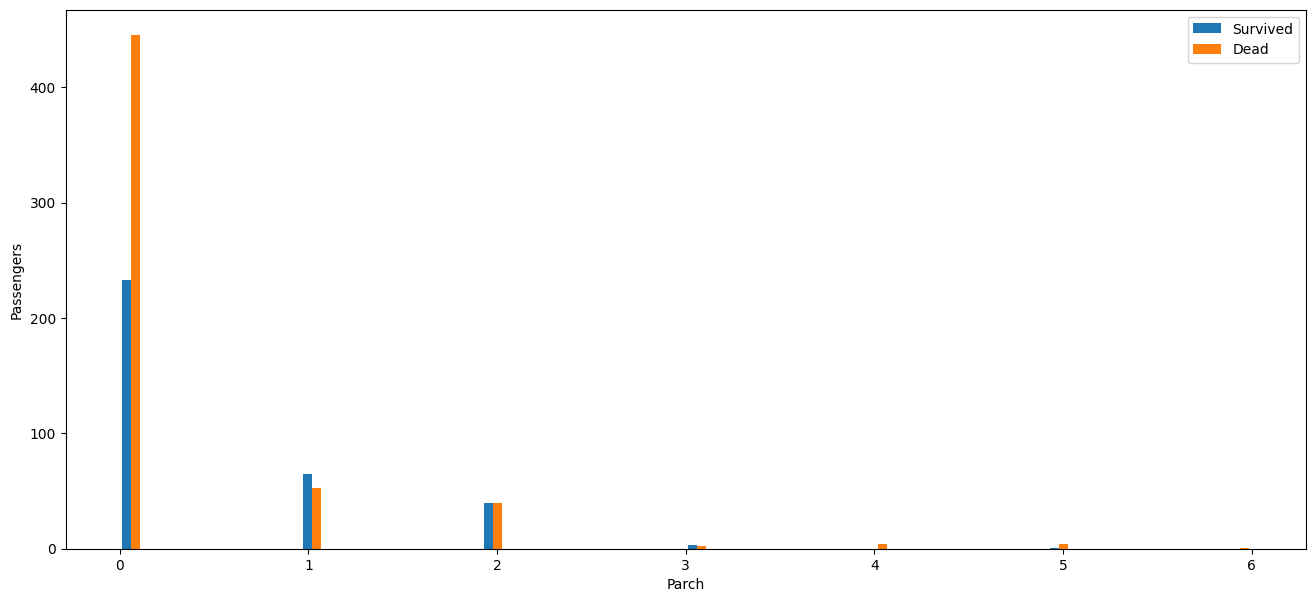

In [53]:
# Does having parents / child determine survivor? Families seems to have a bigger chance to survive

figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['Parch'], combined_df[combined_df['Survived'] == 0]['Parch']], 
         stacked=False, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Parch')
plt.ylabel('Passengers')
plt.legend()

In [54]:
# title in name might be of importance
# first split at the , take the 2nd element
# second split at the . take the 1st element
titles = set()
for name in combined_df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Col', 'Ms', 'Major', 'Mrs', 'Capt', 'Mr', 'Sir', 'Mlle', 'the Countess', 'Don', 'Dr', 'Dona', 'Jonkheer', 'Master', 'Rev', 'Lady', 'Mme', 'Miss'}


In [55]:
# map Function:
#   combined_df['Name'].map(...): The map function applies a given function to each element in a Series (in this case, the 'Name' column of combined_df). 
#   The function definition is provided within the parentheses.

# Lambda Function:
#   lambda name: ...: This defines an anonymous function (lambda function) that takes a single argument named name. 
#   The lambda function itself performs the string manipulation to extract the title.

combined_df['Title'] = combined_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
#combined_df['Title'] = combined_df.Title.map(Title_Dictionary)
combined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,Mr


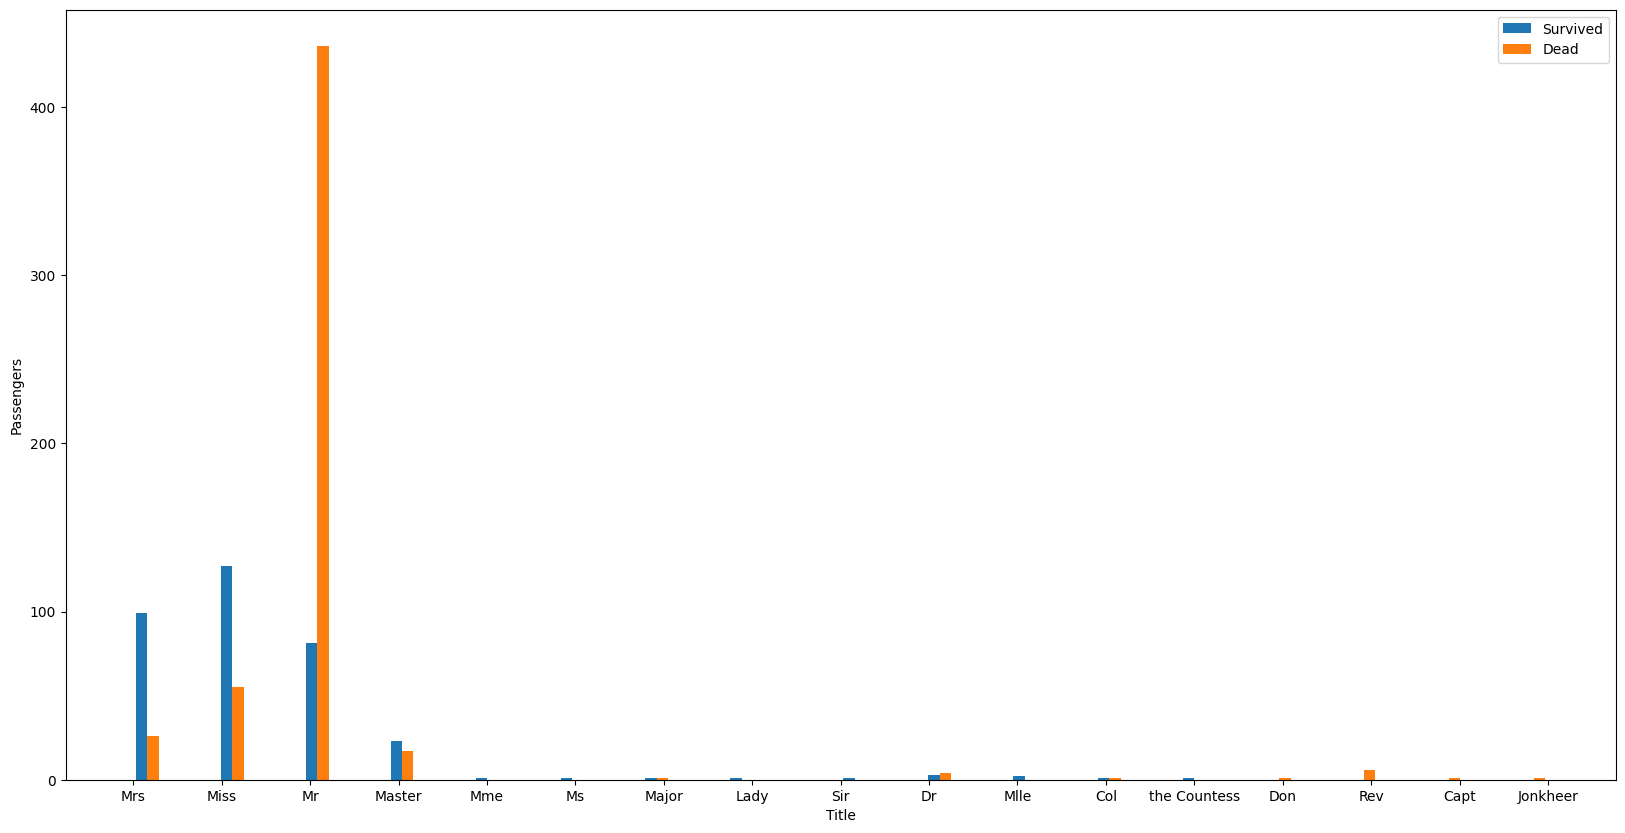

In [56]:
figure = plt.figure(figsize=(20, 10))
plt.hist([combined_df[combined_df['Survived'] == 1]['Title'], combined_df[combined_df['Survived'] == 0]['Title']], 
         stacked=False, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Title')
plt.ylabel('Passengers')
plt.legend()

In [57]:
# Reduce the title to significant groups. Eg. Ms, Miss and Mrs will be common lady

Title_Dictionary = {"Capt": "upper_class",
                    "Col": "upper_class",
                    "Major": "upper_class",
                    "Jonkheer": "upper_class",
                    "Don": "upper_class",
                    "Dona": "upper_class",
                    "Sir" : "upper_class",
                    "Dr": "upper_class",
                    "Rev": "upper_class",
                    "the Countess":"upper_class",
                    "Mme": "common_woman",
                    "Mlle": "common_woman",
                    "Ms": "common_woman",
                    "Mr" : "common_man",
                    "Mrs" : "common_woman",
                    "Miss" : "common_woman",
                    "Master" : "upper_class",
                    "Lady" : "upper_class"}
combined_df['Title']=combined_df['Title'].map(Title_Dictionary)


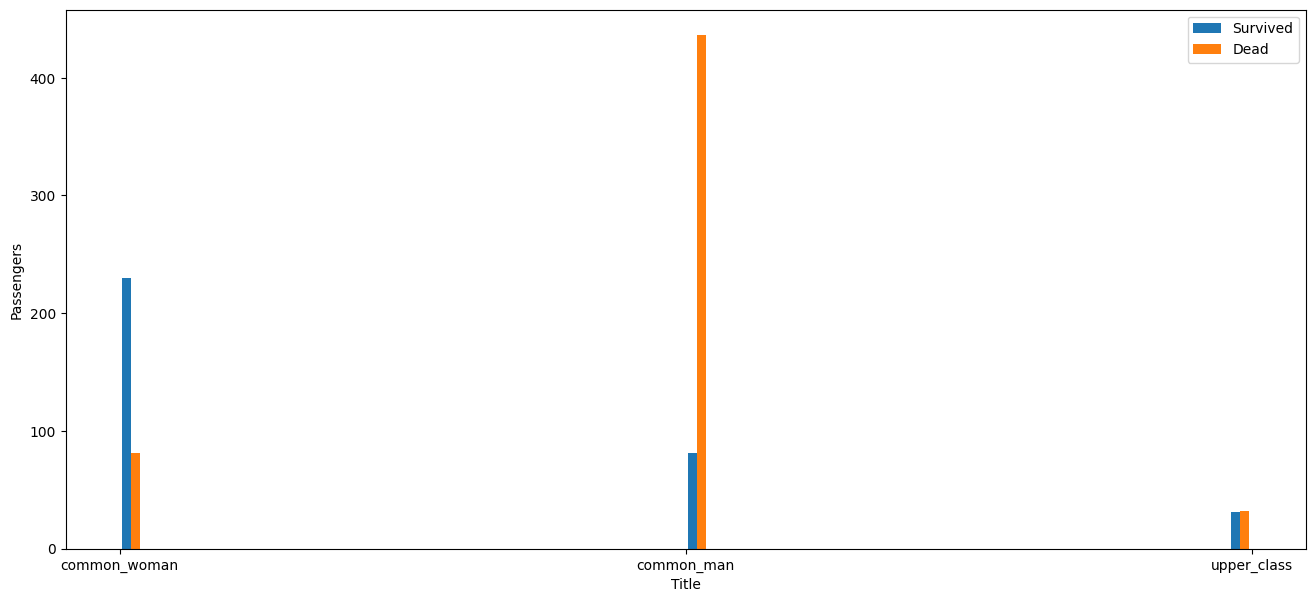

In [58]:
figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['Title'], combined_df[combined_df['Survived'] == 0]['Title']], 
         stacked=False, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Title')
plt.ylabel('Passengers')
plt.legend()

In [59]:
# Creating a new feature: Family Size. 
combined_df['fam_size']=combined_df['Parch']+combined_df['SibSp']+1

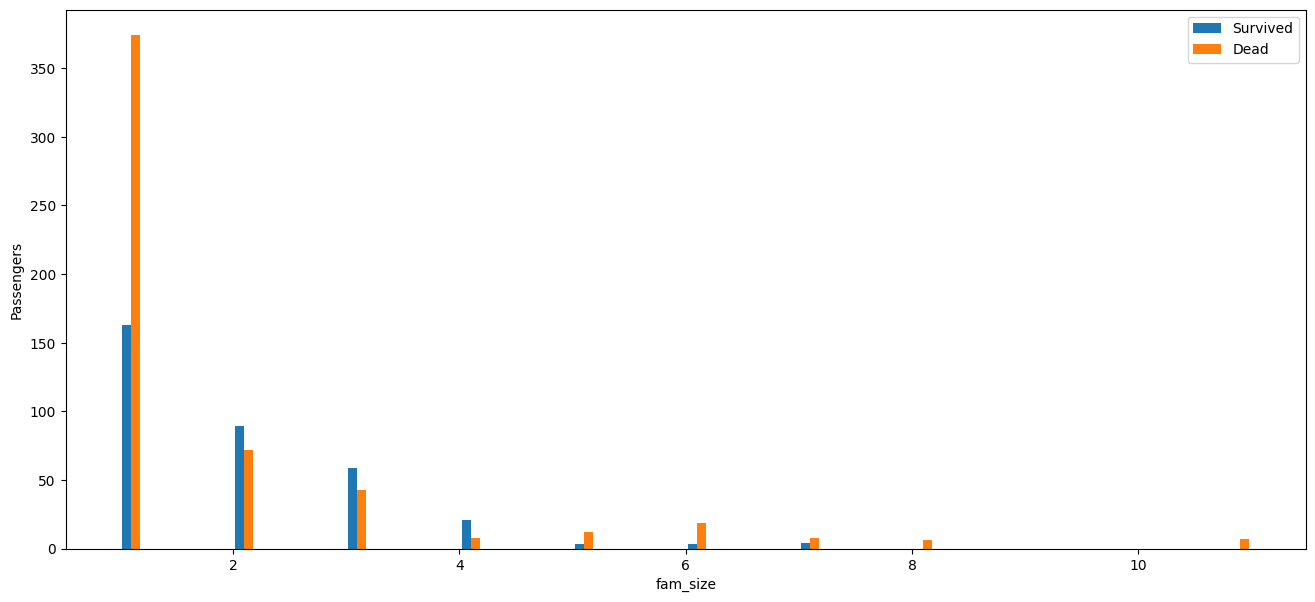

In [60]:
figure = plt.figure(figsize=(16, 7))
plt.hist([combined_df[combined_df['Survived'] == 1]['fam_size'], combined_df[combined_df['Survived'] == 0]['fam_size']], 
         stacked=False, bins = 50, label = ['Survived','Dead'])
plt.xlabel('fam_size')
plt.ylabel('Passengers')
plt.legend()

# Clean the data (Null value data: Age, Fare & Cabin?)

In [61]:
# dropping umwanted columns
df1=combined_df.drop(['Name','Ticket','Cabin','Died'], axis=1)
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,fam_size
0,1,0.0,3,male,22.0,1,0,7.2500,S,common_man,2
1,2,1.0,1,female,38.0,1,0,71.2833,C,common_woman,2
2,3,1.0,3,female,26.0,0,0,7.9250,S,common_woman,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,common_woman,2
4,5,0.0,3,male,35.0,0,0,8.0500,S,common_man,1


In [62]:
# filling in the age with the median group by Sex
df1["Age"] = df1["Age"].fillna(df1.groupby("Sex")["Age"].transform('median'))

In [63]:
df1["Fare"] = df1["Fare"].fillna(df1.groupby("Pclass")["Fare"].transform('median'))

In [64]:
df1.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
fam_size         0
dtype: int64

In [65]:
df1["Embarked"] = df1["Embarked"].fillna(df1.groupby("Pclass")["Embarked"].transform(lambda x: x.fillna(x.mode()[0])))

<Axes: >

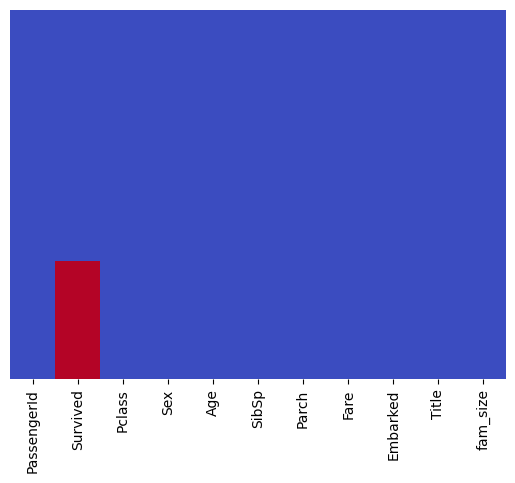

In [66]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [67]:
# convert categorical feature
df2 = pd.get_dummies(df1)

<Axes: >

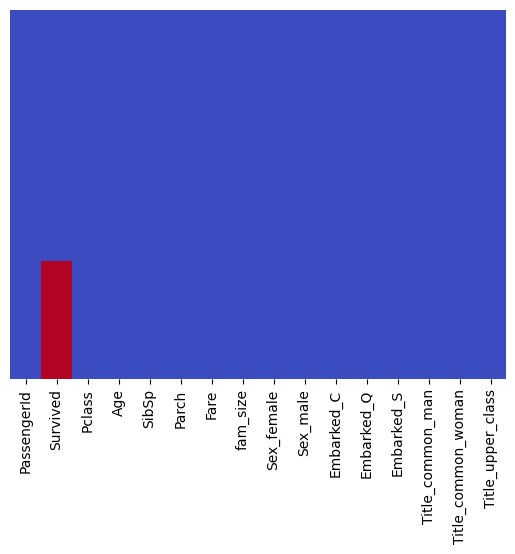

In [68]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

# Split Dataset

In [69]:
# Split the data set so to build our model
train_df = df2[df2["Survived"].notna()]
train_df = train_df.drop(["PassengerId"], axis = 1)
train_df["Survived"]=train_df["Survived"].astype(np.int64)

# test_df = df2[df2["Survived"].isna()]
# test_df = test_df.drop(["Survived"], axis = 1)

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Age                 891 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Fare                891 non-null    float64
 6   fam_size            891 non-null    int64  
 7   Sex_female          891 non-null    bool   
 8   Sex_male            891 non-null    bool   
 9   Embarked_C          891 non-null    bool   
 10  Embarked_Q          891 non-null    bool   
 11  Embarked_S          891 non-null    bool   
 12  Title_common_man    891 non-null    bool   
 13  Title_common_woman  891 non-null    bool   
 14  Title_upper_class   891 non-null    bool   
dtypes: bool(8), float64(2), int64(5)
memory usage: 62.6 KB


In [71]:
# Create the X and y train sets
X_train = train_df.drop(["Survived"], axis = 1)
y_train = train_df["Survived"]

In [72]:
test_df = df2[df2["Survived"].isna()]
X_test = test_df.drop(["Survived","PassengerId"], axis = 1)

In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    float64
 2   SibSp               418 non-null    int64  
 3   Parch               418 non-null    int64  
 4   Fare                418 non-null    float64
 5   fam_size            418 non-null    int64  
 6   Sex_female          418 non-null    bool   
 7   Sex_male            418 non-null    bool   
 8   Embarked_C          418 non-null    bool   
 9   Embarked_Q          418 non-null    bool   
 10  Embarked_S          418 non-null    bool   
 11  Title_common_man    418 non-null    bool   
 12  Title_common_woman  418 non-null    bool   
 13  Title_upper_class   418 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 26.1 KB


In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
print(X_train)

[[ 0.82737724 -0.56080437  0.43279337 ...  0.85053175 -0.73226149
  -0.27583864]
 [-1.56610693  0.6680026   0.43279337 ... -1.17573506  1.36563237
  -0.27583864]
 [ 0.82737724 -0.25360262 -0.4745452  ... -1.17573506  1.36563237
  -0.27583864]
 ...
 [ 0.82737724 -0.17680219  0.43279337 ... -1.17573506  1.36563237
  -0.27583864]
 [-1.56610693 -0.25360262 -0.4745452  ...  0.85053175 -0.73226149
  -0.27583864]
 [ 0.82737724  0.20719999 -0.4745452  ...  0.85053175 -0.73226149
  -0.27583864]]


In [76]:
print(X_test)

[[ 0.82737724  0.39920108 -0.4745452  ...  0.85053175 -0.73226149
  -0.27583864]
 [ 0.82737724  1.35920652  0.43279337 ... -1.17573506  1.36563237
  -0.27583864]
 [-0.36936484  2.51121305 -0.4745452  ...  0.85053175 -0.73226149
  -0.27583864]
 ...
 [ 0.82737724  0.70640282 -0.4745452  ...  0.85053175 -0.73226149
  -0.27583864]
 [ 0.82737724 -0.10000175 -0.4745452  ...  0.85053175 -0.73226149
  -0.27583864]
 [ 0.82737724 -0.10000175  0.43279337 ... -1.17573506 -0.73226149
   3.62530787]]


In [77]:
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Models

## kNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [79]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
y_pred = knn_model.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
knn_model.score(X_train, y_train)
classifier = round(knn_model.score(X_train, y_train) * 100, 2)
classifier

86.42

In [82]:
# To create submission.csv
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)


## SVC

In [83]:
from sklearn.svm import SVC

In [84]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [85]:
y_pred = svm_model.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score
knn_model.score(X_train, y_train)
classifier = round(svm_model.score(X_train, y_train) * 100, 2)
classifier

84.4

In [87]:
# To create submission.csv
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('submission_SVM.csv', index=False)

## Log regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [90]:
y_pred = lg_model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
knn_model.score(X_train, y_train)
classifier = round(lg_model.score(X_train, y_train) * 100, 2)
classifier

81.26

In [92]:
# To create submission.csv
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('submission_LogRegression.csv', index=False)

## Neural Network

In [93]:
import tensorflow as tf

In [94]:
# sequential groups a linear stack of layers into a Model
# tf.keras.layers : Pass a dense layer with the following attriubutes https://www.tensorflow.org/api_docs/python/tf/keras/layers
# final layer is a sigmoid. projecting predictions to be zero or one. like a logistic regression. Can round to 0 or 1 and classify g & h 
nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation='relu', input_shape=(14,)),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

# default learning rate is 0.001 so we just keep it as it is
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                  metrics=['accuracy'])

c:\Users\d3smo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
history = nn_model.fit(
    X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0
  )

In [96]:
# from tensorflow tutorial. plot the loss of the model over the different epoch
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.grid(True)
  plt.show()
  
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.show()

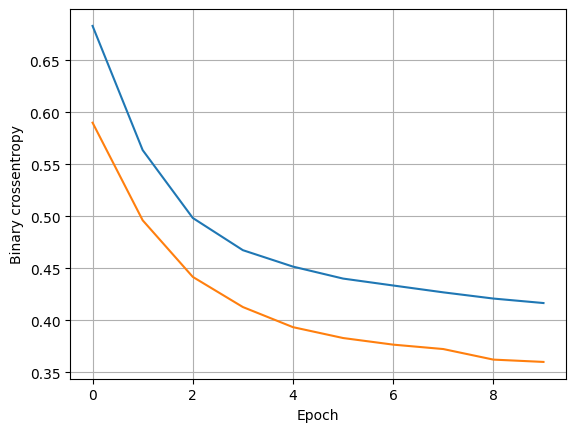

In [97]:
plot_loss(history)

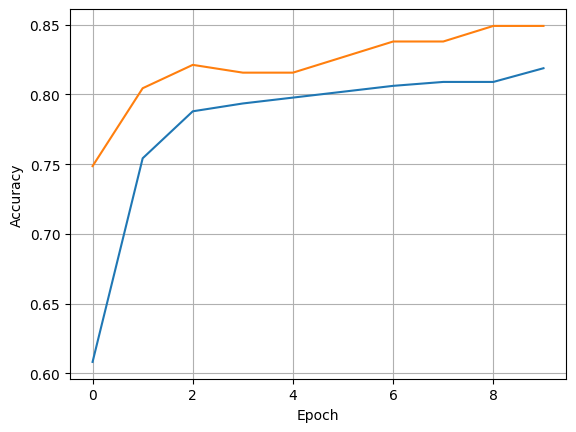

In [98]:
plot_accuracy(history)

In [99]:
y_pred = nn_model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [103]:
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

In [104]:
# To create submission.csv

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('submission_neuralnetowrk.csv', index=False)